# dcd_ch3_hw

## Homework for Chapter 3

In [12]:
from math import exp
from PSP_ThomasAlgorithm import ThomasBoundaryCondition
import PSP_grid as grid
import matplotlib.pyplot as plt
import numpy as np
from main import *

## Problem 1

If we begin at equ 3.7 we can plug in the area of a sphere, $4 \pi x^2$ as $A(x)$. Then, pulling the constant of $1/4 \pi$ out of the integral we get intermediate 2. Then, applying the inetegral, we can evaluate from $x_1$ to $x_2$, after reaching common denominators in intermediate three completing the denominator. Then by using the negetive exponent rule to adjust the $4 \pi * x_1 *x_2 $ we get the final equation

equ (3.7): $$\dfrac{D_g} {\displaystyle \int_{x_1}^{x_2} {\dfrac{\mathrm{d}x}{A(x)}}} $$

intermediate 1: $$ \dfrac{D_g}{\displaystyle \int_{x_1}^{x_2} \dfrac{\mathrm{d}x}{4 \pi x^2}} $$

intermediate 2: $$ \dfrac{D_g}{\dfrac{1}{4\pi} \displaystyle \int_{x_1}^{x_2} \dfrac{\mathrm{d}x}{x^2}} $$

int applied: $$\dfrac{D_g}{\dfrac{1}{4\pi} * -(x^{-2}+1)}$$

intermediate 3: $$ \dfrac{D_g} {\dfrac{1}{4\pi} * (\dfrac{x_2}{x_1*x_2} - \dfrac{x_1}{x_1*x_2})} $$

final result (eq. 3.10): $$\dfrac{4 * \pi * D_g * x_1 *x_2}{x_2-x_1} $$


For the second equation (eq 3.11) we must first apply $A(x)$ to be $2 \pi x$. then as last time we can remove the $1/2\pi$ from the integration to get int 2. then integrating with respect that the integral of $dx/x = \ln{|x|}$ we get int 3. by the law of logs we then get the final result



equ (3.7): $$ \dfrac{D_g}{\displaystyle \int_{x_1}^{x_2} \dfrac{\mathrm{d}x}{A(x)}} $$

intermediate 1: $$ \dfrac{D_g}{\displaystyle \int_{x_1}^{x_2} \dfrac{\mathrm{d}x}{2 \pi  x}} $$

intermediate 2: $$ \dfrac{D_g}{\dfrac{1}{2\pi}\displaystyle \int_{x_1}^{x_2} \dfrac{\mathrm{d}x}{x}} $$

intermediate 3: $$ \dfrac{D_g}{\dfrac{1}{2\pi}*(\ln{x_2}-\ln{x_1})}  $$

final result: $$ \dfrac{2*\pi*D_g}{\ln{(x_2/x_1)}} $$

## Problem #2

In [31]:
def testing(waterContent,bulkDensity,oxygenDiff,coDiff):
    R = 8.3143                     
    n = 20                        
    totalDepth = 0.5                          
    particleDensity = 2650.         
    waterContent = 0.2                 
    respRate = -0.001                        
    temperature = 25.             
    atmPressure = 101.3           
    boundaryLayerCond = 0.01     
    
    # O2 concentration in air [g/m^3]
    boundaryOxygenConc = (0.21 * atmPressure * 1000. * 32. / 
                          (R * (temperature + 273.15))) 
    porosity = 1. - bulkDensity / particleDensity
    gasPorosity = porosity - waterContent
    
    #  binary diffusion coefficient [m2/s]
    binaryDiffCoeff = (oxygenDiff * (101.3 / atmPressure) 
                * ((temperature + 273.15) / 273.15)**1.75)
    binaryDiffCoeffco = (oxygenDiff * (101.3 / atmPressure) 
                * ((temperature + 273.15) / 273.15)**1.75)
    
    bg = 0.9           
    mg = 2.3           
    dg = binaryDiffCoeff * bg * gasPorosity**mg
    dgco = binaryDiffCoeff * bg * gasPorosity**mg

    z, co = gasSolver(boundaryLayerCond, boundaryOxygenConc, 
                      dg, respRate, totalDepth, n)
    zco, c1 = gasSolver(boundaryLayerCond, boundaryOxygenConc, 
                      dgco, respRate, totalDepth, n)
      
    print ("node   depth [m]   Co [g\m^3]")
    for i in range(n + 2):
        print ("%3d    %6.2f      %.2f" %(i, z[i], co[i]))
    
    # plot results
    fig = plt.figure(figsize=(10,8))
    for i in range(n+1):
        plt.plot(co[i], -z[i], 'bo')
        plt.plot(c1[i], -zco[i], 'r^')
        
    plt.xlabel('Concentration [g m$^{-3}$]',fontsize=20,labelpad=8)
    plt.ylabel('Depth [m]',fontsize=20,labelpad=8)
    plt.tick_params(axis='both', which='major', labelsize=20,pad=8)
    plt.tick_params(axis='both', which='minor', labelsize=20,pad=8)
    plt.show()



node   depth [m]   Co [g\m^3]
  0      0.00      274.61
  1      0.00      274.59
  2      0.03      271.08
  3      0.05      267.92
  4      0.08      265.09
  5      0.10      262.56
  6      0.12      260.31
  7      0.15      258.30
  8      0.17      256.53
  9      0.20      254.97
 10      0.22      253.61
 11      0.25      252.44
 12      0.27      251.42
 13      0.30      250.56
 14      0.33      249.85
 15      0.35      249.26
 16      0.38      248.79
 17      0.40      248.43
 18      0.43      248.18
 19      0.45      248.01
 20      0.48      247.93
 21      0.50      0.00


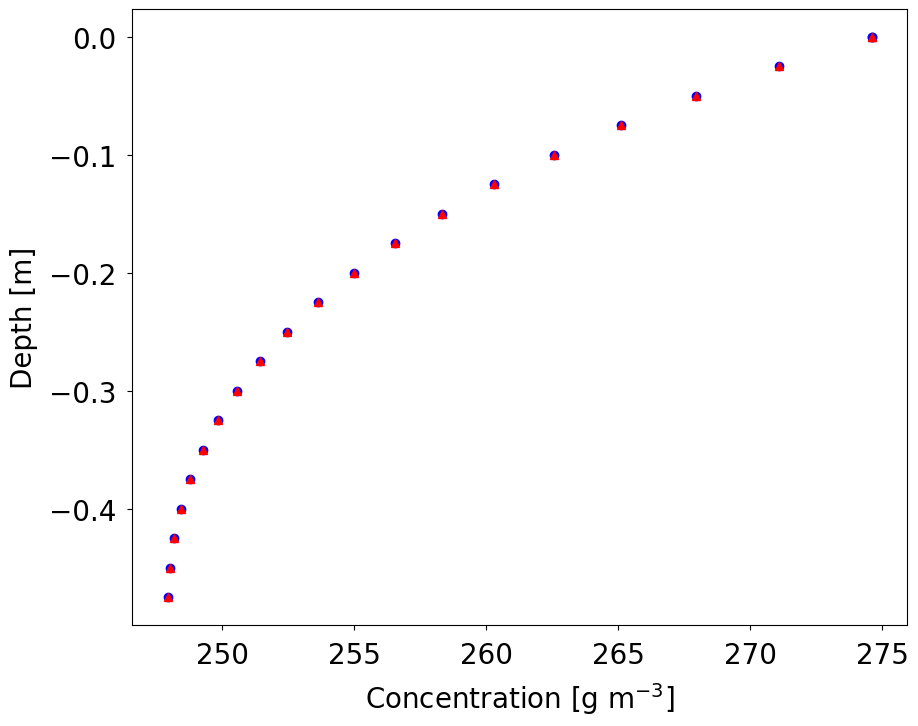

In [32]:
waterContent = 0.2
bulkDensity = 1200.
oxygenDiff = 1.77e-5
coDiff = 1.39e-5
testing(waterContent,bulkDensity,oxygenDiff,coDiff)

the above is the original graph, after this will be an increase to the VWC, pb, K_O_2, and K_CO_2

node   depth [m]   Co [g\m^3]
  0      0.00      274.61
  1      0.00      274.59
  2      0.03      271.08
  3      0.05      267.92
  4      0.08      265.09
  5      0.10      262.56
  6      0.12      260.31
  7      0.15      258.30
  8      0.17      256.53
  9      0.20      254.97
 10      0.22      253.61
 11      0.25      252.44
 12      0.27      251.42
 13      0.30      250.56
 14      0.33      249.85
 15      0.35      249.26
 16      0.38      248.79
 17      0.40      248.43
 18      0.43      248.18
 19      0.45      248.01
 20      0.48      247.93
 21      0.50      0.00


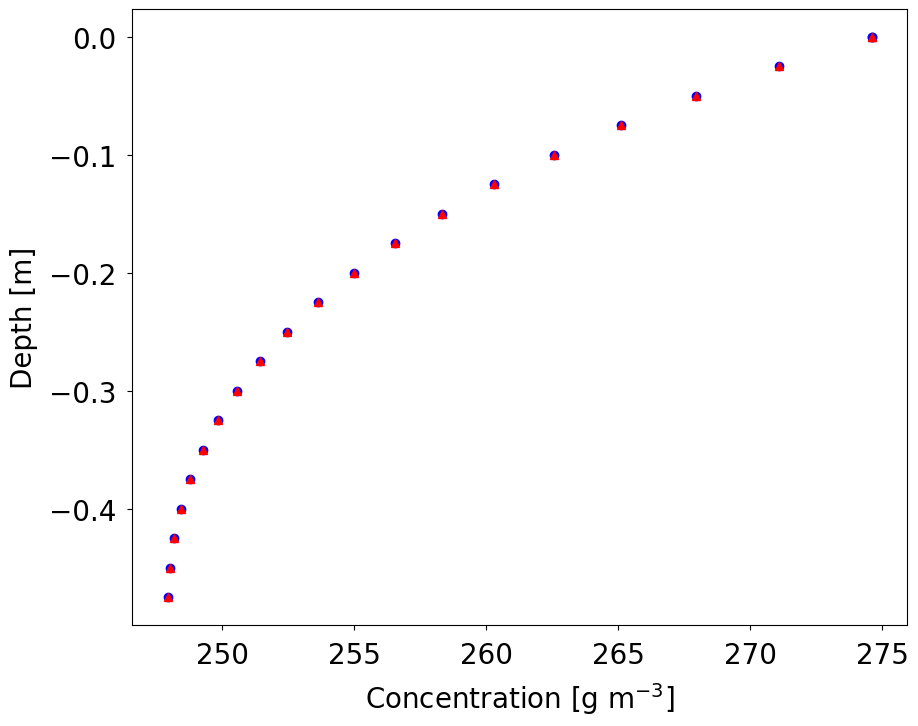

In [33]:
waterContent = 0.4 #increased VWC
bulkDensity = 1200.
oxygenDiff = 1.77e-5
coDiff = 1.39e-5
testing(waterContent,bulkDensity,oxygenDiff,coDiff)

node   depth [m]   Co [g\m^3]
  0      0.00      274.61
  1      0.00      274.59
  2      0.03      271.08
  3      0.05      267.92
  4      0.08      265.09
  5      0.10      262.56
  6      0.12      260.31
  7      0.15      258.30
  8      0.17      256.53
  9      0.20      254.97
 10      0.22      253.61
 11      0.25      252.44
 12      0.27      251.42
 13      0.30      250.56
 14      0.33      249.85
 15      0.35      249.26
 16      0.38      248.79
 17      0.40      248.43
 18      0.43      248.18
 19      0.45      248.01
 20      0.48      247.93
 21      0.50      0.00


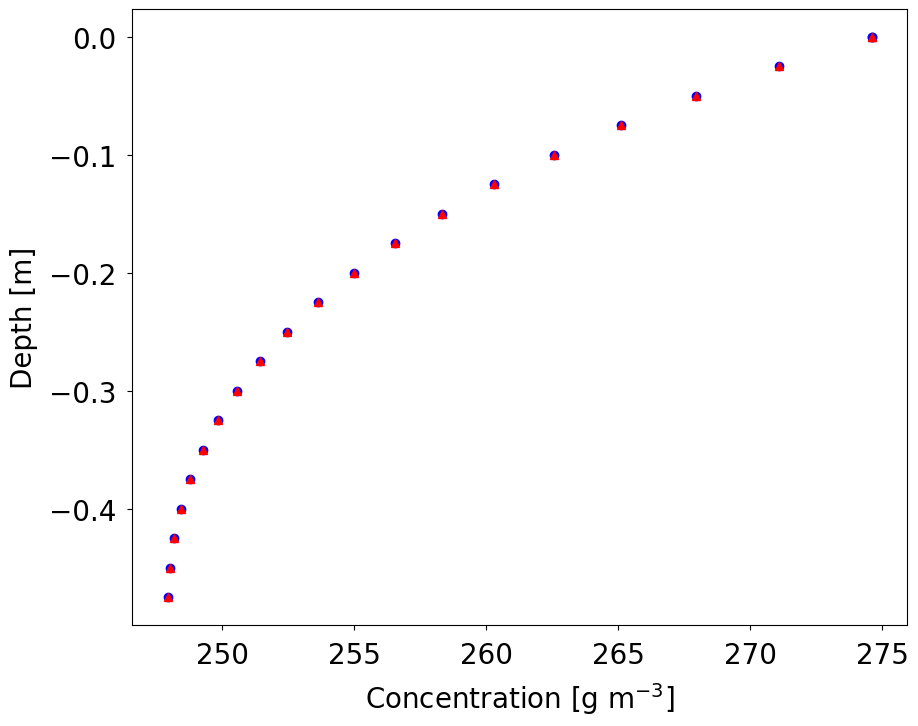

In [34]:
waterContent = 0.1 #half VWC
bulkDensity = 1200.
oxygenDiff = 1.77e-5
coDiff = 1.39e-5
testing(waterContent,bulkDensity,oxygenDiff,coDiff)

node   depth [m]   Co [g\m^3]
  0      0.00      274.61
  1      0.00      274.59
  2      0.03      272.11
  3      0.05      269.88
  4      0.08      267.88
  5      0.10      266.09
  6      0.12      264.50
  7      0.15      263.08
  8      0.17      261.83
  9      0.20      260.73
 10      0.22      259.77
 11      0.25      258.94
 12      0.27      258.22
 13      0.30      257.61
 14      0.33      257.11
 15      0.35      256.69
 16      0.38      256.36
 17      0.40      256.11
 18      0.43      255.93
 19      0.45      255.81
 20      0.48      255.75
 21      0.50      0.00


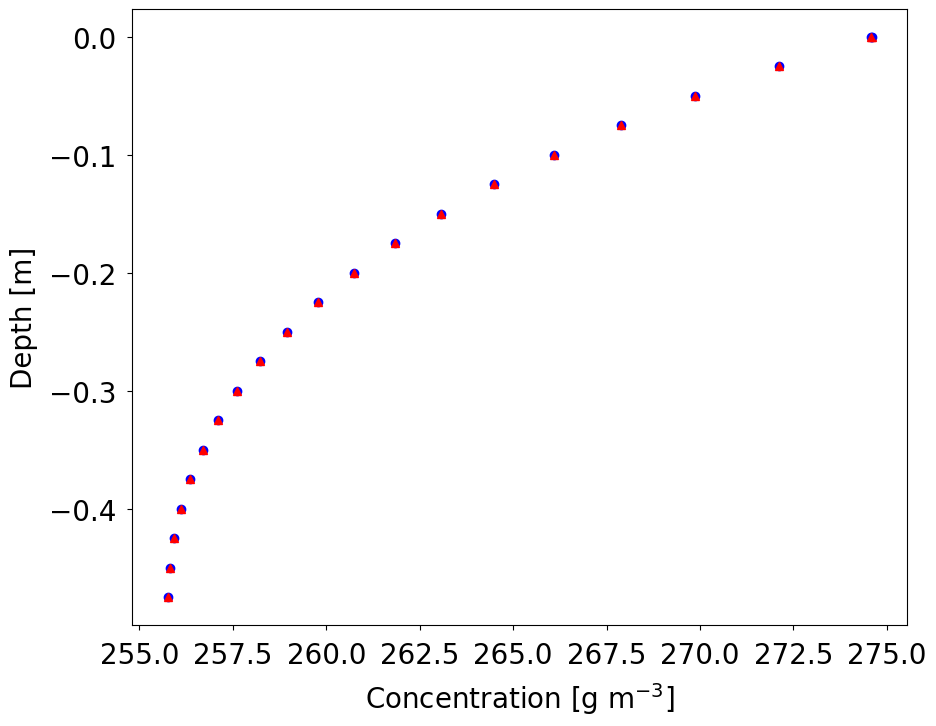

In [35]:
waterContent = 0.2
bulkDensity = 1050.# decreased pb
oxygenDiff = 1.77e-5
coDiff = 1.39e-5
testing(waterContent,bulkDensity,oxygenDiff,coDiff)

node   depth [m]   Co [g\m^3]
  0      0.00      274.61
  1      0.00      274.59
  2      0.03      268.42
  3      0.05      262.88
  4      0.08      257.91
  5      0.10      253.46
  6      0.12      249.49
  7      0.15      245.97
  8      0.17      242.86
  9      0.20      240.12
 10      0.22      237.73
 11      0.25      235.66
 12      0.27      233.88
 13      0.30      232.37
 14      0.33      231.11
 15      0.35      230.08
 16      0.38      229.26
 17      0.40      228.63
 18      0.43      228.17
 19      0.45      227.88
 20      0.48      227.75
 21      0.50      0.00


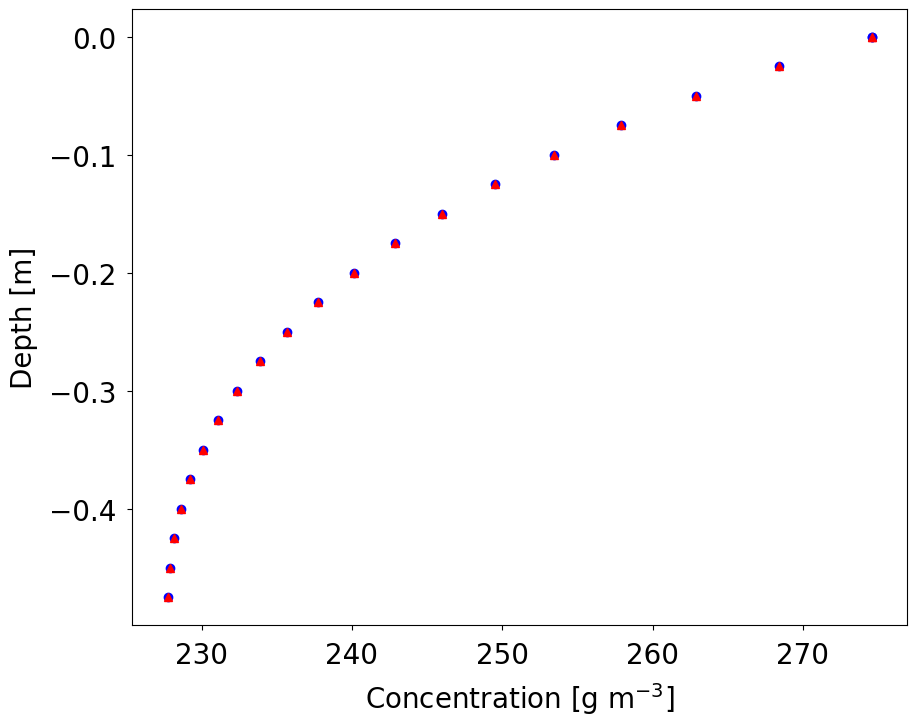

In [36]:
waterContent = 0.2
bulkDensity = 1400. #increased pb
oxygenDiff = 1.77e-5
coDiff = 1.39e-5
testing(waterContent,bulkDensity,oxygenDiff,coDiff)

Gas concentration did not drastically change when changing the water content for CO2 and O2(if I coded that funcion properly. Decreased bulk density did however allow for more diffusion and thus higher concentrations at depth and vice versa for higher desities.

## Problem 3